In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv

df = pd.read_excel('final.xlsx')

In [3]:
df.head()

,Unnamed: 0,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Zip,Income,lat,lng
0,0,2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,0.3500,0.0935,0.5565,92392,104993.5,34.479332,-117.397422
1,1,2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,0.5233,0.1120,0.3647,90003,40865.2,33.963074,-118.274809
2,2,2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,0.6041,0.2028,0.1931,92201,91188.0,33.711551,-116.236141
3,3,2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,0.7161,0.1884,0.0955,92625,55627.0,33.601873,-117.866850
4,4,2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,0.7447,0.2129,0.0424,92596,12713.0,33.638018,-117.088880


In [4]:
df= df.drop(['Unnamed: 0','lat','lng'],axis=1)

In [5]:
df=df.drop(['Impressions','Clicks','Conv. rate','Cost / conv.'],axis=1)

In [6]:
df.head()

,Day,Day of week,Cost,CTR,Avg. CPC,Conversions,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Zip,Income
0,2019-01-02,2,1298.05,0.0012,24.04,15.0,0.3500,0.0935,0.5565,92392,104993.5
1,2019-01-03,3,1480.26,0.0266,25.09,10.1,0.5233,0.1120,0.3647,90003,40865.2
2,2019-01-04,4,1953.52,0.0030,17.76,22.0,0.6041,0.2028,0.1931,92201,91188.0
3,2019-01-05,5,2507.57,0.0068,20.39,29.5,0.7161,0.1884,0.0955,92625,55627.0
4,2019-01-06,6,1591.91,0.0058,18.09,16.5,0.7447,0.2129,0.0424,92596,12713.0


In [7]:
Mean_encoded_subject = df.groupby(['Zip'])['Income'].mean().to_dict() 
  
df['Zip_income'] =  df['Zip'].map(Mean_encoded_subject) 


In [9]:
df= df.drop(['Zip'],axis=1)

In [10]:
df.head()

,Day,Day of week,Cost,CTR,Avg. CPC,Conversions,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Income,Zip_income
0,2019-01-02,2,1298.05,0.0012,24.04,15.0,0.3500,0.0935,0.5565,104993.5,80940.71000
1,2019-01-03,3,1480.26,0.0266,25.09,10.1,0.5233,0.1120,0.3647,40865.2,40865.20000
2,2019-01-04,4,1953.52,0.0030,17.76,22.0,0.6041,0.2028,0.1931,91188.0,88801.65125
3,2019-01-05,5,2507.57,0.0068,20.39,29.5,0.7161,0.1884,0.0955,55627.0,55627.00000
4,2019-01-06,6,1591.91,0.0058,18.09,16.5,0.7447,0.2129,0.0424,12713.0,34731.76000


In [11]:
df['Day']=pd.to_datetime(df['Day'])
df['day']=pd.to_datetime(df['Day']).dt.day
df['month']=pd.to_datetime(df['Day']).dt.month
df['year']=pd.to_datetime(df['Day']).dt.year
df['quarter']=pd.to_datetime(df['Day']).dt.quarter


In [13]:
df=df.drop(['Day'],axis=1)

In [14]:
df.head()

,Day of week,Cost,CTR,Avg. CPC,Conversions,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Income,Zip_income,day,month,year,quarter
0,2,1298.05,0.0012,24.04,15.0,0.3500,0.0935,0.5565,104993.5,80940.71000,2,1,2019,1
1,3,1480.26,0.0266,25.09,10.1,0.5233,0.1120,0.3647,40865.2,40865.20000,3,1,2019,1
2,4,1953.52,0.0030,17.76,22.0,0.6041,0.2028,0.1931,91188.0,88801.65125,4,1,2019,1
3,5,2507.57,0.0068,20.39,29.5,0.7161,0.1884,0.0955,55627.0,55627.00000,5,1,2019,1
4,6,1591.91,0.0058,18.09,16.5,0.7447,0.2129,0.0424,12713.0,34731.76000,6,1,2019,1


In [15]:
train=df[0:650]
cv=df[650:710]
test=df[710:]

In [17]:
import autofeat

from autofeat import AutoFeatRegressor

In [18]:
y_train=train['Income']
X_train=train.drop(['Income'],axis=1)

In [20]:
X_train.shape

(650, 13)

In [21]:
afreg = AutoFeatRegressor(verbose=1, feateng_steps=3)
df = afreg.fit_transform(X_train,y_train)

[AutoFeat] The 3 step feature engineering process could generate up to 102466 features.
[AutoFeat] With 650 data points this new feature matrix would use about 0.27 gb of space.
[feateng] Step 1: transformation of original features


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


[feateng] Generated 58 transformed features from 13 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 9757 feature combinations from 2485 original feature tuples - done.
[feateng] Step 3: transformation of new features


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


[feateng] Generated 40253 transformed features from 9757 original features - done.
[feateng] Generated altogether 53189 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 26798 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 40 features after 5 feature selection runs
[featsel] 22 features after correlation filtering
[featsel] 11 features after noise filtering
[AutoFeat] Computing 11 new features.
[AutoFeat]    11/   11 new features ...done.
[AutoFeat] Final dataframe with 24 feature columns (11 new).
[AutoFeat] Training final regression model.
[AutoFeat] Trained model: largest coefficients:
35453.99635626434
3219220.204492 * CTR*SearchLostISbudget**3
-87477.869241 * (SearchImprshare - 1/quarter)**2
-64723.373480

In [22]:
df.head()

,Day of week,Cost,CTR,Avg. CPC,Conversions,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Zip_income,day,...,sqrt(Conversions)*exp(SearchLostISbudget),SearchLostISrank*exp(1/AvgCPC),(SearchImprshare - 1/quarter)**2,(Dayofweek**3 - sqrt(Zip_income))**2,CTR*SearchLostISbudget**3,SearchLostISbudget**(3/2)*month**6,sqrt(log(quarter))*Abs(Zip_income),exp(2*Dayofweek)*exp(2*SearchLostISbudget),Dayofweek**6*Zip_income,(AvgCPC**2 + exp(Dayofweek))**2
0,2.0,1298.05,0.0012,24.04,15.0,0.3500,0.0935,0.5565,80940.71000,2.0,...,6.756636,0.097471,0.422500,76452.697065,2.068125e-04,0.415143,0.0,166.168112,5.180205e+06,342588.564143
1,3.0,1480.26,0.0266,25.09,10.1,0.5233,0.1120,0.3647,40865.20000,3.0,...,4.576652,0.116554,0.227243,30678.022867,1.290295e-03,0.220244,0.0,836.645128,2.979073e+07,421971.893131
2,4.0,1953.52,0.0030,17.76,22.0,0.6041,0.2028,0.1931,88801.65125,4.0,...,5.689493,0.214547,0.156737,54754.155683,2.160071e-05,0.084854,0.0,4386.118735,3.637316e+08,136911.655273
3,5.0,2507.57,0.0068,20.39,29.5,0.7161,0.1884,0.0955,55627.00000,5.0,...,5.975663,0.197870,0.080599,12288.557936,5.922690e-06,0.029512,0.0,26662.143717,8.691719e+08,318282.439578
4,6.0,1591.91,0.0058,18.09,16.5,0.7447,0.2129,0.0424,34731.76000,6.0,...,4.237952,0.225000,0.065178,878.257590,4.421051e-07,0.008731,0.0,177158.483865,1.620445e+09,533888.722684


In [23]:
from sklearn.ensemble import ExtraTreesRegressor

In [24]:
reg= ExtraTreesRegressor()
reg.fit(df,y_train)

ExtraTreesRegressor()

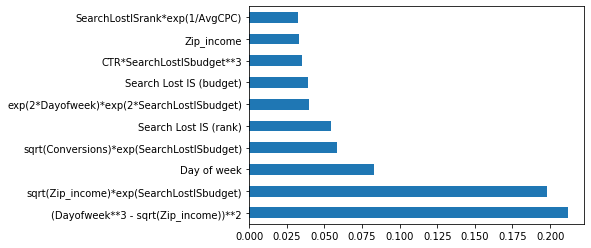

In [26]:
feat_importances = pd.Series(reg.feature_importances_, index=df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
df.columns

Index(['Day of week', 'Cost', 'CTR', 'Avg. CPC', 'Conversions',
       'Search Impr. share', 'Search Lost IS (rank)',
       'Search Lost IS (budget)', 'Zip_income', 'day', 'month', 'year',
       'quarter', 'sqrt(Zip_income)*exp(SearchLostISbudget)',
       'sqrt(Conversions)*exp(SearchLostISbudget)',
       'SearchLostISrank*exp(1/AvgCPC)', '(SearchImprshare - 1/quarter)**2',
       '(Dayofweek**3 - sqrt(Zip_income))**2', 'CTR*SearchLostISbudget**3',
       'SearchLostISbudget**(3/2)*month**6',
       'sqrt(log(quarter))*Abs(Zip_income)',
       'exp(2*Dayofweek)*exp(2*SearchLostISbudget)', 'Dayofweek**6*Zip_income',
       '(AvgCPC**2 + exp(Dayofweek))**2'],
      dtype='object')

In [35]:
top_5_fe= df[['(Dayofweek**3 - sqrt(Zip_income))**2','sqrt(Zip_income)*exp(SearchLostISbudget)','Day of week','sqrt(Conversions)*exp(SearchLostISbudget)','Search Lost IS (rank)','exp(2*Dayofweek)*exp(2*SearchLostISbudget)','Search Lost IS (budget)','CTR*SearchLostISbudget**3','Zip_income','SearchLostISrank*exp(1/AvgCPC)']]

In [36]:
top_5_fe.head()

,(Dayofweek**3 - sqrt(Zip_income))**2,sqrt(Zip_income)*exp(SearchLostISbudget),Day of week,sqrt(Conversions)*exp(SearchLostISbudget),Search Lost IS (rank),exp(2*Dayofweek)*exp(2*SearchLostISbudget),Search Lost IS (budget),CTR*SearchLostISbudget**3,Zip_income,SearchLostISrank*exp(1/AvgCPC)
0,76452.697065,496.327552,2.0,6.756636,0.0935,166.168112,0.5565,2.068125e-04,80940.71000,0.097471
1,30678.022867,291.114617,3.0,4.576652,0.1120,836.645128,0.3647,1.290295e-03,40865.20000,0.116554
2,54754.155683,361.470438,4.0,5.689493,0.2028,4386.118735,0.1931,2.160071e-05,88801.65125,0.214547
3,12288.557936,259.488397,5.0,5.975663,0.1884,26662.143717,0.0955,5.922690e-06,55627.00000,0.197870
4,878.257590,194.436360,6.0,4.237952,0.2129,177158.483865,0.0424,4.421051e-07,34731.76000,0.225000


In [37]:
import xgboost as xgb

xgbst_reg=xgb.XGBRegressor()

In [42]:
xgbst_reg.fit(df,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
xgbst_reg.score(df,y_train)

0.9999310061677071

In [46]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbst_reg,df,y_train,cv=5)

In [47]:
score.mean()

0.48936420699013894